In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
## Read the training and validation datasets
train =  pd.read_csv("../Data/Output/TrainingData.csv")
val = pd.read_csv("../Data/Output/ValidationData.csv")

## Check the data looks fine
# Understanding basic information about the data
print("Number of rows in train data = ", train.shape[0])
print("Number of columns in train data = ", train.shape[1])
print("\n")
print(" *** Sample Carrier Data ******")
display(train.head(5))

print("\n")
print("----------------------------------------------------------")
print("\n")


print("Number of rows in Validation Data = ", val.shape[0])
print("Number of columns in Validation Data = ", val.shape[1])
print("\n")
print("** Sample Validation Data **")
val.head()

Number of rows in train data =  4253
Number of columns in train data =  56


 *** Sample Carrier Data ******


,Unnamed: 0,COMPANY ID,CITY,ST,DOMICILE REGION,ZIP,TRAC,TRAIL,VAN,REFR,INTER,CURT,FLAT,STEP,DD,OVER,TANK,PNEUM,BULK,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,GARBAGE_TRASH,GENERAL_FREIGHT,GRAIN_FEED,HOUSEHOLD_GOODS,INTERMODAL,LIQUIDS_GASES,LIVESTOCK,LOG_POLE,MACHINERY_LARGE_OBJECTS,MEAT,METAL_SHEETS_ROLLS,MOBILE_HOMES,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL,ONLY_VAN,VAN_REFR,VAN_FLAT,ONLY_REFR,ONLY_FLAT,REFR_FLAT
0,2045,2329,MAYO,FL,SE,32066,0.008604,0.0050,1,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
1,389,413,LA SALLE,QC,CAN,H8N 3A9,0.006618,0.0048,0,1,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0
2,1683,1914,CHICAGO,IL,MDW,60632,0.013236,0.0400,1,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
3,3152,3596,SAN DIEGO,CA,PAC,92154,0.015884,0.0060,1,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
4,169,183,BUFFALO,NY,NE,14207,0.006618,0.0040,0,0,0,0,0,0,0,0,1,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0




----------------------------------------------------------


Number of rows in Validation Data =  1064
Number of columns in Validation Data =  56


** Sample Validation Data **


,Unnamed: 0,COMPANY ID,CITY,ST,DOMICILE REGION,ZIP,TRAC,TRAIL,VAN,REFR,INTER,CURT,FLAT,STEP,DD,OVER,TANK,PNEUM,BULK,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,GARBAGE_TRASH,GENERAL_FREIGHT,GRAIN_FEED,HOUSEHOLD_GOODS,INTERMODAL,LIQUIDS_GASES,LIVESTOCK,LOG_POLE,MACHINERY_LARGE_OBJECTS,MEAT,METAL_SHEETS_ROLLS,MOBILE_HOMES,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL,ONLY_VAN,VAN_REFR,VAN_FLAT,ONLY_REFR,ONLY_FLAT,REFR_FLAT
0,1106,1225,BRANTLEY,AL,SE,36009,0.017538,0.0110,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,2984,3409,BUCKEYE,AZ,SW,85326,0.003309,0.0020,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
2,5250,5962,WAUTOMA,WI,MDW,54982,0.010258,0.0214,1,1,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
3,2537,2894,SEBRINGVILLE,ON,CAN,N0K 1X0,0.021178,0.0252,1,0,0,1,1,1,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
4,2147,2442,MELROSE PARK,IL,MDW,60160,0.023825,0.0144,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [4]:
## Create a Training and Validation dataset with only the Commodities Columns
train_X_onlyCommodities = train.iloc[:, 19:50]
train_Y_onlyCommodities = train[['VAN', 'REFR', 'FLAT']]

val_X_onlyCommodities = val.iloc[:, 19:50]
val_Y_onlyCommodities = val[['VAN', 'REFR', 'FLAT']]

#### Create Training and Validation datasets with Number of Tractors and Trailers also
train_X_tractrail = train.iloc[:, np.r_[6:8,19:50]]
train_Y_tractrail = train[['VAN', 'REFR', 'FLAT']]

val_X_tractrail = val.iloc[:, np.r_[6:8,19:50]]
val_Y_tractrail = val[['VAN', 'REFR', 'FLAT']]

In [52]:
combData = train_X_tractrail.append(val_X_tractrail, ignore_index = True)

,TRAC,TRAIL,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,GARBAGE_TRASH,GENERAL_FREIGHT,GRAIN_FEED,HOUSEHOLD_GOODS,INTERMODAL,LIQUIDS_GASES,LIVESTOCK,LOG_POLE,MACHINERY_LARGE_OBJECTS,MEAT,METAL_SHEETS_ROLLS,MOBILE_HOMES,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL
0,0.008604,0.0050,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006618,0.0048,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.013236,0.0400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.015884,0.0060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.006618,0.0040,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


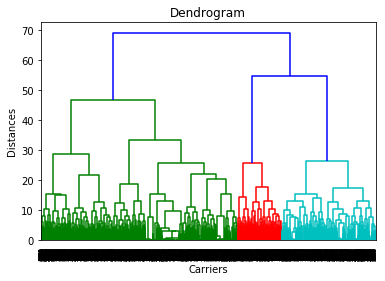

In [54]:
# Plot the dendogram

dendrogram = sch.dendrogram(sch.linkage(combData, method  = "ward", metric="euclidean"))
plt.title('Dendrogram')
plt.xlabel('Carriers')
plt.ylabel('Distances')
plt.show()

In [55]:
## Visually , the optimal number of clusters to consider here is 6

hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='ward')

In [56]:
y_hc=hc.fit_predict(combData)

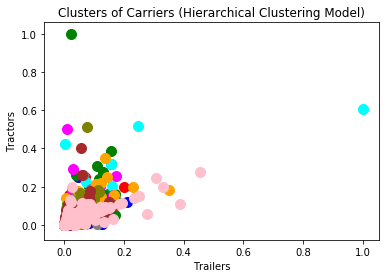

In [58]:
plt.scatter(combData.iloc[y_hc==0, 0], combData.iloc[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(combData.iloc[y_hc==1, 0], combData.iloc[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(combData.iloc[y_hc==2, 0], combData.iloc[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(combData.iloc[y_hc==3, 0], combData.iloc[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(combData.iloc[y_hc==4, 0], combData.iloc[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(combData.iloc[y_hc==5, 0], combData.iloc[y_hc==5, 1], s=100, c='gray', label ='Cluster 6')
plt.scatter(combData.iloc[y_hc==6, 0], combData.iloc[y_hc==6, 1], s=100, c='orange', label ='Cluster 7')
plt.scatter(combData.iloc[y_hc==7, 0], combData.iloc[y_hc==7, 1], s=100, c='olive', label ='Cluster 8')
plt.scatter(combData.iloc[y_hc==8, 0], combData.iloc[y_hc==8, 1], s=100, c='brown', label ='Cluster 9')
plt.scatter(combData.iloc[y_hc==9, 0], combData.iloc[y_hc==9, 1], s=100, c='pink', label ='Cluster 10')


plt.title('Clusters of Carriers (Hierarchical Clustering Model)')
plt.xlabel('Trailers')
plt.ylabel('Tractors')
plt.show()

In [59]:
## Summary of the clusters

clusters = pd.Series(y_hc) 

combData_val = train_Y_tractrail.append(val_Y_tractrail, ignore_index=True)

fullData = pd.concat([combData.reset_index(drop=True), combData_val,clusters], axis=1)

fullData.rename(columns = {0 : 'Cluster'}, inplace = True)

In [60]:
fullData.head()

,TRAC,TRAIL,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,GARBAGE_TRASH,GENERAL_FREIGHT,GRAIN_FEED,HOUSEHOLD_GOODS,INTERMODAL,LIQUIDS_GASES,LIVESTOCK,LOG_POLE,MACHINERY_LARGE_OBJECTS,MEAT,METAL_SHEETS_ROLLS,MOBILE_HOMES,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL,VAN,REFR,FLAT,Cluster
0,0.008604,0.0050,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,6
1,0.006618,0.0048,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,3
2,0.013236,0.0400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,6
3,0.015884,0.0060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,6
4,0.006618,0.0040,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1


In [63]:
fullData.summ = fullData.groupby('Cluster').mean().reset_index()

fullData.summ.head(10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Cluster,TRAC,TRAIL,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,GARBAGE_TRASH,GENERAL_FREIGHT,GRAIN_FEED,HOUSEHOLD_GOODS,INTERMODAL,LIQUIDS_GASES,LIVESTOCK,LOG_POLE,MACHINERY_LARGE_OBJECTS,MEAT,METAL_SHEETS_ROLLS,MOBILE_HOMES,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL,VAN,REFR,FLAT
0,0,0.014884,0.016770,0.008969,0.484305,0.109118,0.028401,0.294469,0.044843,0.179372,0.032885,0.029895,0.035874,0.699552,0.052317,0.007474,0.091181,0.191330,0.007474,0.269058,0.659193,0.007474,0.409567,0.004484,0.094170,0.200299,0.234679,0.083707,0.008969,0.055306,0.004484,0.019432,0.059791,0.014948,0.261584,0.086697,0.591928
1,1,0.014581,0.012337,0.015517,0.044828,0.050000,0.068966,0.062069,0.005172,0.315517,0.098276,0.034483,0.018966,0.367241,0.296552,0.006897,0.050000,0.446552,0.062069,0.048276,0.081034,0.001724,0.022414,0.000000,0.008621,0.056897,0.520690,0.024138,0.003448,0.018966,0.003448,0.001724,0.013793,0.008621,0.236207,0.086207,0.210345
2,2,0.016125,0.018976,0.277427,0.051702,0.002522,0.003783,0.027743,0.010088,0.122320,0.015132,0.727617,0.012610,0.839849,0.085750,0.008827,0.060530,0.030265,0.018916,0.036570,0.020177,0.401009,0.056747,0.000000,0.027743,0.003783,0.271122,0.157629,0.001261,0.933165,0.005044,0.008827,0.035309,0.001261,0.378310,0.892812,0.074401
3,3,0.018682,0.023053,0.809237,0.815261,0.212851,0.090361,0.393574,0.052209,0.506024,0.411647,0.835341,0.072289,0.991968,0.449799,0.240964,0.259036,0.140562,0.072289,0.433735,0.548193,0.610442,0.620482,0.008032,0.190763,0.080321,0.232932,0.907631,0.040161,0.839357,0.152610,0.114458,0.124498,0.018072,0.646586,0.638554,0.248996
4,4,0.018711,0.026185,0.619141,0.394531,0.289062,0.017578,0.056641,0.013672,0.314453,0.029297,0.193359,0.017578,0.988281,0.107422,0.154297,0.244141,0.101562,0.007812,0.175781,0.169922,0.017578,0.306641,0.003906,0.058594,0.017578,0.195312,0.808594,0.007812,0.140625,0.074219,0.021484,0.052734,0.000000,0.796875,0.244141,0.212891
5,5,0.014209,0.017741,0.153846,0.954262,0.216216,0.064449,0.733888,0.139293,0.270270,0.415800,0.122661,0.062370,0.941788,0.384615,0.043659,0.313929,0.195426,0.066528,0.765073,0.877339,0.020790,0.856549,0.014553,0.214137,0.301455,0.207900,0.380457,0.012474,0.051975,0.031185,0.099792,0.079002,0.024948,0.359667,0.066528,0.706861
6,6,0.018744,0.021663,0.760807,0.262248,0.190202,0.015850,0.044669,0.008646,0.182997,0.028818,0.842939,0.012968,0.972622,0.070605,0.148415,0.131124,0.102305,0.015850,0.080692,0.080692,0.599424,0.141210,0.002882,0.027378,0.005764,0.131124,0.837176,0.008646,0.968300,0.110951,0.005764,0.135447,0.001441,0.546110,0.834294,0.087896
7,7,0.017285,0.024675,0.708543,0.984925,0.331658,0.180905,0.889447,0.216080,0.768844,0.914573,0.542714,0.195980,0.964824,0.929648,0.402010,0.572864,0.266332,0.090452,0.884422,0.914573,0.331658,0.984925,0.050251,0.517588,0.537688,0.301508,0.884422,0.005025,0.437186,0.211055,0.472362,0.090452,0.155779,0.567839,0.216080,0.562814
8,8,0.015433,0.017162,0.005051,0.016835,0.020202,0.001684,0.003367,0.006734,0.008418,0.003367,0.087542,0.013468,0.888889,0.006734,0.001684,0.291246,0.006734,0.000000,0.000000,0.008418,0.035354,0.005051,0.001684,0.001684,0.010101,0.020202,0.010101,0.005051,0.010101,0.006734,0.001684,0.153199,0.000000,0.590909,0.313131,0.181818
9,9,0.031156,0.024152,0.090909,0.030303,0.949495,0.057239,0.043771,0.013468,0.296296,0.070707,0.013468,0.037037,0.700337,0.117845,0.013468,0.272727,0.710438,0.006734,0.023569,0.053872,0.000000,0.057239,0.000000,0.006734,0.013468,0.178451,0.127946,0.006734,0.047138,0.003367,0.003367,0.067340,0.013468,0.417508,0.107744,0.121212


In [64]:
## Rename the Last 3 columns in the Full Data Summ tab

fullData.summ.rename(columns = {'VAN' : 'VAN_PROB', 'REFR' : 'REFR_PROB', 'FLAT' : 'FLAT_PROB'}, inplace = True)


In [65]:
fullData.summ.head(10)

,Cluster,TRAC,TRAIL,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,GARBAGE_TRASH,GENERAL_FREIGHT,GRAIN_FEED,HOUSEHOLD_GOODS,INTERMODAL,LIQUIDS_GASES,LIVESTOCK,LOG_POLE,MACHINERY_LARGE_OBJECTS,MEAT,METAL_SHEETS_ROLLS,MOBILE_HOMES,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL,VAN_PROB,REFR_PROB,FLAT_PROB
0,0,0.014884,0.016770,0.008969,0.484305,0.109118,0.028401,0.294469,0.044843,0.179372,0.032885,0.029895,0.035874,0.699552,0.052317,0.007474,0.091181,0.191330,0.007474,0.269058,0.659193,0.007474,0.409567,0.004484,0.094170,0.200299,0.234679,0.083707,0.008969,0.055306,0.004484,0.019432,0.059791,0.014948,0.261584,0.086697,0.591928
1,1,0.014581,0.012337,0.015517,0.044828,0.050000,0.068966,0.062069,0.005172,0.315517,0.098276,0.034483,0.018966,0.367241,0.296552,0.006897,0.050000,0.446552,0.062069,0.048276,0.081034,0.001724,0.022414,0.000000,0.008621,0.056897,0.520690,0.024138,0.003448,0.018966,0.003448,0.001724,0.013793,0.008621,0.236207,0.086207,0.210345
2,2,0.016125,0.018976,0.277427,0.051702,0.002522,0.003783,0.027743,0.010088,0.122320,0.015132,0.727617,0.012610,0.839849,0.085750,0.008827,0.060530,0.030265,0.018916,0.036570,0.020177,0.401009,0.056747,0.000000,0.027743,0.003783,0.271122,0.157629,0.001261,0.933165,0.005044,0.008827,0.035309,0.001261,0.378310,0.892812,0.074401
3,3,0.018682,0.023053,0.809237,0.815261,0.212851,0.090361,0.393574,0.052209,0.506024,0.411647,0.835341,0.072289,0.991968,0.449799,0.240964,0.259036,0.140562,0.072289,0.433735,0.548193,0.610442,0.620482,0.008032,0.190763,0.080321,0.232932,0.907631,0.040161,0.839357,0.152610,0.114458,0.124498,0.018072,0.646586,0.638554,0.248996
4,4,0.018711,0.026185,0.619141,0.394531,0.289062,0.017578,0.056641,0.013672,0.314453,0.029297,0.193359,0.017578,0.988281,0.107422,0.154297,0.244141,0.101562,0.007812,0.175781,0.169922,0.017578,0.306641,0.003906,0.058594,0.017578,0.195312,0.808594,0.007812,0.140625,0.074219,0.021484,0.052734,0.000000,0.796875,0.244141,0.212891
5,5,0.014209,0.017741,0.153846,0.954262,0.216216,0.064449,0.733888,0.139293,0.270270,0.415800,0.122661,0.062370,0.941788,0.384615,0.043659,0.313929,0.195426,0.066528,0.765073,0.877339,0.020790,0.856549,0.014553,0.214137,0.301455,0.207900,0.380457,0.012474,0.051975,0.031185,0.099792,0.079002,0.024948,0.359667,0.066528,0.706861
6,6,0.018744,0.021663,0.760807,0.262248,0.190202,0.015850,0.044669,0.008646,0.182997,0.028818,0.842939,0.012968,0.972622,0.070605,0.148415,0.131124,0.102305,0.015850,0.080692,0.080692,0.599424,0.141210,0.002882,0.027378,0.005764,0.131124,0.837176,0.008646,0.968300,0.110951,0.005764,0.135447,0.001441,0.546110,0.834294,0.087896
7,7,0.017285,0.024675,0.708543,0.984925,0.331658,0.180905,0.889447,0.216080,0.768844,0.914573,0.542714,0.195980,0.964824,0.929648,0.402010,0.572864,0.266332,0.090452,0.884422,0.914573,0.331658,0.984925,0.050251,0.517588,0.537688,0.301508,0.884422,0.005025,0.437186,0.211055,0.472362,0.090452,0.155779,0.567839,0.216080,0.562814
8,8,0.015433,0.017162,0.005051,0.016835,0.020202,0.001684,0.003367,0.006734,0.008418,0.003367,0.087542,0.013468,0.888889,0.006734,0.001684,0.291246,0.006734,0.000000,0.000000,0.008418,0.035354,0.005051,0.001684,0.001684,0.010101,0.020202,0.010101,0.005051,0.010101,0.006734,0.001684,0.153199,0.000000,0.590909,0.313131,0.181818
9,9,0.031156,0.024152,0.090909,0.030303,0.949495,0.057239,0.043771,0.013468,0.296296,0.070707,0.013468,0.037037,0.700337,0.117845,0.013468,0.272727,0.710438,0.006734,0.023569,0.053872,0.000000,0.057239,0.000000,0.006734,0.013468,0.178451,0.127946,0.006734,0.047138,0.003367,0.003367,0.067340,0.013468,0.417508,0.107744,0.121212


In [66]:
## Merge with the Full Dataset with Company Id

fullData_merge  = pd.merge(fullData, fullData.summ[['Cluster', 'VAN_PROB', 'REFR_PROB', 'FLAT_PROB']], on='Cluster')


In [67]:
fullData_merge.head()

,TRAC,TRAIL,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,GARBAGE_TRASH,GENERAL_FREIGHT,GRAIN_FEED,HOUSEHOLD_GOODS,INTERMODAL,LIQUIDS_GASES,LIVESTOCK,LOG_POLE,MACHINERY_LARGE_OBJECTS,MEAT,METAL_SHEETS_ROLLS,MOBILE_HOMES,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL,VAN,REFR,FLAT,Cluster,VAN_PROB,REFR_PROB,FLAT_PROB
0,0.008604,0.0050,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,6,0.54611,0.834294,0.087896
1,0.013236,0.0400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,6,0.54611,0.834294,0.087896
2,0.015884,0.0060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,6,0.54611,0.834294,0.087896
3,0.005295,0.0054,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,6,0.54611,0.834294,0.087896
4,0.045665,0.1788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,6,0.54611,0.834294,0.087896


In [83]:
## Create New Trainig and Validation Sets

from sklearn.model_selection import train_test_split

## Split the data into training and validation set with 80% data for training
train_hc, val_hc = train_test_split(fullData_merge, test_size = 0.2)

#### Create Training and Validation datasets with Number of Tractors and Trailers also
train_X_hc = train_hc.iloc[:, np.r_[0:33,37:40]]
train_Y_hc = train_hc[['VAN', 'REFR', 'FLAT']]

val_X_hc = val_hc.iloc[:, np.r_[0:33,37:40]]
val_Y_hc = val_hc[['VAN', 'REFR', 'FLAT']]

### One vs. All Model with Clustering Inputs

In [86]:
### One vs. All Classifier -- with Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier


labels = list(train_Y_hc.columns.values)

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for label in labels:
    print('**Processing {} Equipment Label...**'.format(label))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(train_X_hc, train_Y_hc[label])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(val_X_hc)
    print('Validation accuracy is {}'.format(accuracy_score(val_Y_hc[label], prediction)))
    print("hamming loss :",metrics.hamming_loss(val_Y_hc[label],prediction))
    print("Precision recall report :\n",metrics.classification_report(val_Y_hc[label], prediction))
    print("\n")

**Processing VAN Equipment Label...**
Validation accuracy is 0.6964285714285714
hamming loss : 0.30357142857142855
Precision recall report :
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       560
           1       0.69      0.65      0.67       504

    accuracy                           0.70      1064
   macro avg       0.70      0.69      0.69      1064
weighted avg       0.70      0.70      0.70      1064



**Processing REFR Equipment Label...**
Validation accuracy is 0.8721804511278195
hamming loss : 0.12781954887218044
Precision recall report :
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       643
           1       0.87      0.79      0.83       421

    accuracy                           0.87      1064
   macro avg       0.87      0.86      0.86      1064
weighted avg       0.87      0.87      0.87      1064



**Processing FLAT Equipment Label...**
Validation accurac

### Label Powerset with Clustering Inputs

In [87]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(train_X_hc, train_Y_hc)
# predict
predictions = classifier.predict(val_X_hc)
# accuracy
# accuracy
# accuracy
print("accuracy :",metrics.accuracy_score(val_Y_hc,predictions))
print("macro f1 score :",metrics.f1_score(val_Y_hc, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(val_Y_hc, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(val_Y_hc,predictions))
print("Precision recall report :\n",metrics.classification_report(val_Y_hc, predictions))



C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy : 0.5140977443609023
macro f1 score : 0.6854930606157721
micro f1 scoore : 0.6967916854948034
hamming loss : 0.21021303258145363
Precision recall report :
               precision    recall  f1-score   support

           0       0.75      0.57      0.65       504
           1       0.87      0.78      0.82       421
           2       0.71      0.49      0.58       312

   micro avg       0.79      0.62      0.70      1237
   macro avg       0.78      0.62      0.69      1237
weighted avg       0.78      0.62      0.69      1237
 samples avg       0.63      0.54      0.56      1237



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
